http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [143]:
s = pd.Series([1,3,5,np.nan,6,8])

In [144]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [145]:
dates = pd.date_range('20130101', periods=6)

In [146]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [147]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [148]:
df

,A,B,C,D
2013-01-01,0.534028,-0.614137,-0.314005,0.603820
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919
2013-01-04,0.415159,0.378502,-0.356266,1.012351
2013-01-05,-0.691143,-1.096223,-0.674282,-0.673755
2013-01-06,0.528720,-1.082556,-0.814403,0.007584


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [149]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [150]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [151]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [152]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [153]:
df.head()

,A,B,C,D
2013-01-01,0.534028,-0.614137,-0.314005,0.603820
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919
2013-01-04,0.415159,0.378502,-0.356266,1.012351
2013-01-05,-0.691143,-1.096223,-0.674282,-0.673755


In [154]:
df.tail(3)

,A,B,C,D
2013-01-04,0.415159,0.378502,-0.356266,1.012351
2013-01-05,-0.691143,-1.096223,-0.674282,-0.673755
2013-01-06,0.528720,-1.082556,-0.814403,0.007584


Display the index, columns, and the underlying numpy data

In [155]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [156]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [157]:
df.values

array([[ 0.53402785, -0.61413686, -0.31400549,  0.60381986],
       [ 0.83435077,  0.13886678,  0.25977948, -1.48419109],
       [ 0.22369178,  0.33493539, -0.7209125 ,  0.7679194 ],
       [ 0.41515924,  0.37850205, -0.35626613,  1.01235119],
       [-0.69114346, -1.09622328, -0.67428174, -0.67375486],
       [ 0.52871956, -1.08255598, -0.81440269,  0.00758422]])

Describe shows a quick statistic summary of your data

In [158]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.307468,-0.323435,-0.436682,0.038955
std,0.527964,0.692512,0.396608,0.961964
min,-0.691143,-1.096223,-0.814403,-1.484191
25%,0.271559,-0.965451,-0.709255,-0.503420
50%,0.471939,-0.237635,-0.515274,0.305702
75%,0.532701,0.285918,-0.324571,0.726895
max,0.834351,0.378502,0.259779,1.012351


Transposing your data

In [159]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.534028,0.834351,0.223692,0.415159,-0.691143,0.528720
B,-0.614137,0.138867,0.334935,0.378502,-1.096223,-1.082556
C,-0.314005,0.259779,-0.720912,-0.356266,-0.674282,-0.814403
D,0.603820,-1.484191,0.767919,1.012351,-0.673755,0.007584


Sorting by an axis

In [160]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.603820,-0.314005,-0.614137,0.534028
2013-01-02,-1.484191,0.259779,0.138867,0.834351
2013-01-03,0.767919,-0.720912,0.334935,0.223692
2013-01-04,1.012351,-0.356266,0.378502,0.415159
2013-01-05,-0.673755,-0.674282,-1.096223,-0.691143
2013-01-06,0.007584,-0.814403,-1.082556,0.528720


Sorting by value

In [161]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.691143,-1.096223,-0.674282,-0.673755
2013-01-06,0.528720,-1.082556,-0.814403,0.007584
2013-01-01,0.534028,-0.614137,-0.314005,0.603820
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919
2013-01-04,0.415159,0.378502,-0.356266,1.012351


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [162]:
df['A']

2013-01-01    0.534028
2013-01-02    0.834351
2013-01-03    0.223692
2013-01-04    0.415159
2013-01-05   -0.691143
2013-01-06    0.528720
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [163]:
df[0:3]

,A,B,C,D
2013-01-01,0.534028,-0.614137,-0.314005,0.603820
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919


In [164]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919
2013-01-04,0.415159,0.378502,-0.356266,1.012351


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [165]:
df.loc[dates[0]]

A    0.534028
B   -0.614137
C   -0.314005
D    0.603820
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [166]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.534028,-0.614137
2013-01-02,0.834351,0.138867
2013-01-03,0.223692,0.334935
2013-01-04,0.415159,0.378502
2013-01-05,-0.691143,-1.096223
2013-01-06,0.528720,-1.082556


Showing label slicing, both endpoints are included

In [167]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.834351,0.138867
2013-01-03,0.223692,0.334935
2013-01-04,0.415159,0.378502


Reduction in the dimensions of the returned object

In [168]:
df.loc['20130102',['A','B']]

A    0.834351
B    0.138867
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [169]:
df.loc[dates[0],'A']

0.5340278545799131

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [170]:
df.iloc[3]

A    0.415159
B    0.378502
C   -0.356266
D    1.012351
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [171]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.415159,0.378502
2013-01-05,-0.691143,-1.096223


By lists of integer position locations, similar to the numpy/python style

In [172]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.834351,0.259779
2013-01-03,0.223692,-0.720912
2013-01-05,-0.691143,-0.674282


For slicing rows explicitly

In [173]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919


For slicing columns explicitly

In [174]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.614137,-0.314005
2013-01-02,0.138867,0.259779
2013-01-03,0.334935,-0.720912
2013-01-04,0.378502,-0.356266
2013-01-05,-1.096223,-0.674282
2013-01-06,-1.082556,-0.814403


For getting a value explicitly

In [175]:
df.iloc[1,1]

0.13886678315042197

For getting fast access to a scalar (equiv to the prior method)

In [176]:
df.iat[1,1]

0.13886678315042197

## Boolean Indexing

Using a single column’s values to select data.

In [177]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.534028,-0.614137,-0.314005,0.603820
2013-01-02,0.834351,0.138867,0.259779,-1.484191
2013-01-03,0.223692,0.334935,-0.720912,0.767919
2013-01-04,0.415159,0.378502,-0.356266,1.012351
2013-01-06,0.528720,-1.082556,-0.814403,0.007584


A where operation for getting.

In [178]:
df[df > 0]

,A,B,C,D
2013-01-01,0.534028,NaN,NaN,0.603820
2013-01-02,0.834351,0.138867,0.259779,NaN
2013-01-03,0.223692,0.334935,NaN,0.767919
2013-01-04,0.415159,0.378502,NaN,1.012351
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.528720,NaN,NaN,0.007584


Using the isin() method for filtering:

In [179]:
df2 = df.copy()

In [180]:
df2['E'] = ['one','one', 'two','three','four','three']

In [181]:
df2

,A,B,C,D,E
2013-01-01,0.534028,-0.614137,-0.314005,0.603820,one
2013-01-02,0.834351,0.138867,0.259779,-1.484191,one
2013-01-03,0.223692,0.334935,-0.720912,0.767919,two
2013-01-04,0.415159,0.378502,-0.356266,1.012351,three
2013-01-05,-0.691143,-1.096223,-0.674282,-0.673755,four
2013-01-06,0.528720,-1.082556,-0.814403,0.007584,three


In [182]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.223692,0.334935,-0.720912,0.767919,two
2013-01-05,-0.691143,-1.096223,-0.674282,-0.673755,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [183]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [184]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [185]:
df['F'] = s1

Setting values by label

In [186]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [187]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [188]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [189]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.314005,5,NaN
2013-01-02,0.834351,0.138867,0.259779,5,1.0
2013-01-03,0.223692,0.334935,-0.720912,5,2.0
2013-01-04,0.415159,0.378502,-0.356266,5,3.0
2013-01-05,-0.691143,-1.096223,-0.674282,5,4.0
2013-01-06,0.528720,-1.082556,-0.814403,5,5.0


A where operation with setting.

In [190]:
df2 = df.copy()

In [191]:
df2[df2 > 0] = -df2

In [192]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.314005,-5,NaN
2013-01-02,-0.834351,-0.138867,-0.259779,-5,-1.0
2013-01-03,-0.223692,-0.334935,-0.720912,-5,-2.0
2013-01-04,-0.415159,-0.378502,-0.356266,-5,-3.0
2013-01-05,-0.691143,-1.096223,-0.674282,-5,-4.0
2013-01-06,-0.528720,-1.082556,-0.814403,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [193]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [194]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [195]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.314005,5,NaN,1.0
2013-01-02,0.834351,0.138867,0.259779,5,1.0,1.0
2013-01-03,0.223692,0.334935,-0.720912,5,2.0,NaN
2013-01-04,0.415159,0.378502,-0.356266,5,3.0,NaN


To drop any rows that have missing data.

In [196]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.834351,0.138867,0.259779,5,1.0,1.0


Filling missing data

In [197]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.314005,5,5.0,1.0
2013-01-02,0.834351,0.138867,0.259779,5,1.0,1.0
2013-01-03,0.223692,0.334935,-0.720912,5,2.0,5.0
2013-01-04,0.415159,0.378502,-0.356266,5,3.0,5.0


To get the boolean mask where values are nan

In [198]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [199]:
df.mean()

A    0.218463
B   -0.221079
C   -0.436682
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [200]:
df.mean(1)

2013-01-01    1.171499
2013-01-02    1.446599
2013-01-03    1.367543
2013-01-04    1.687479
2013-01-05    1.307670
2013-01-06    1.726352
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [201]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [202]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [203]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.776308,-0.665065,-1.720912,4.0,1.0
2013-01-04,-2.584841,-2.621498,-3.356266,2.0,0.0
2013-01-05,-5.691143,-6.096223,-5.674282,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [204]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.314005,5,NaN
2013-01-02,0.834351,0.138867,-0.054226,10,1.0
2013-01-03,1.058043,0.473802,-0.775139,15,3.0
2013-01-04,1.473202,0.852304,-1.131405,20,6.0
2013-01-05,0.782058,-0.243919,-1.805686,25,10.0
2013-01-06,1.310778,-1.326475,-2.620089,30,15.0


In [205]:
df.apply(lambda x: x.max() - x.min())

A    1.525494
B    1.474725
C    1.074182
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [206]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [207]:
s

0    6
1    3
2    0
3    0
4    4
5    2
6    4
7    5
8    1
9    1
dtype: int64

In [208]:
s.value_counts()

4    2
1    2
0    2
6    1
5    1
3    1
2    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [209]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [210]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [211]:
df = pd.DataFrame(np.random.randn(10, 4))

In [212]:
df

,0,1,2,3
0,-1.344916,1.196108,-0.995135,-0.434394
1,-0.369084,0.351363,1.294549,1.387934
2,0.785419,-0.124644,-1.008370,0.188902
3,-1.719759,1.221403,-0.269861,1.677366
4,-0.835789,0.985005,0.543002,-0.406606
5,1.354332,0.213535,-1.445380,-0.235695
6,0.366194,0.110017,-0.625537,1.178144
7,-0.540811,1.918338,-0.471941,3.540255
8,1.336398,0.815473,0.295867,-0.916098
9,-0.533720,0.129587,1.314407,-0.608012


In [213]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [214]:
pd.concat(pieces)

,0,1,2,3
0,-1.344916,1.196108,-0.995135,-0.434394
1,-0.369084,0.351363,1.294549,1.387934
2,0.785419,-0.124644,-1.008370,0.188902
3,-1.719759,1.221403,-0.269861,1.677366
4,-0.835789,0.985005,0.543002,-0.406606
5,1.354332,0.213535,-1.445380,-0.235695
6,0.366194,0.110017,-0.625537,1.178144
7,-0.540811,1.918338,-0.471941,3.540255
8,1.336398,0.815473,0.295867,-0.916098
9,-0.533720,0.129587,1.314407,-0.608012


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [215]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [216]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [217]:
left

,key,lval
0,foo,1
1,foo,2


In [218]:
right

,key,rval
0,foo,4
1,foo,5


In [219]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [220]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [221]:
df

,A,B,C,D
0,0.348405,0.279621,-0.025571,0.521804
1,0.052367,-0.235751,-0.087557,0.467247
2,-1.881812,1.097432,0.048949,-0.576790
3,0.066425,-0.382254,1.987775,0.568056
4,-2.155269,-0.648721,0.547744,-0.488963
5,1.532544,-1.157351,1.331688,0.265178
6,0.614749,-1.738930,-0.552001,-1.004841
7,1.009852,0.813361,0.681745,-0.952458


In [222]:
s = df.iloc[3]

In [223]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.348405,0.279621,-0.025571,0.521804
1,0.052367,-0.235751,-0.087557,0.467247
2,-1.881812,1.097432,0.048949,-0.576790
3,0.066425,-0.382254,1.987775,0.568056
4,-2.155269,-0.648721,0.547744,-0.488963
5,1.532544,-1.157351,1.331688,0.265178
6,0.614749,-1.738930,-0.552001,-1.004841
7,1.009852,0.813361,0.681745,-0.952458
8,0.066425,-0.382254,1.987775,0.568056


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [224]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [225]:
df

,A,B,C,D
0,foo,one,0.326705,-1.556890
1,bar,one,1.684093,0.437953
2,foo,two,0.065824,-0.313338
3,bar,three,1.540126,-0.132605
4,foo,two,1.319607,-0.366586
5,bar,two,-2.343430,0.517306
6,foo,one,-0.240107,0.271353
7,foo,three,-0.124137,-0.989177


Grouping and then applying a function sum to the resulting groups.

In [226]:
df.groupby('A').sum()

,C,D
A,,
bar,0.880789,0.822654
foo,1.347892,-2.954639


In [227]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.684093  0.437953
    three  1.540126 -0.132605
    two   -2.343430  0.517306
foo one    0.086599 -1.285537
    three -0.124137 -0.989177
    two    1.385431 -0.679924

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [228]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [229]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [230]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [231]:
df2 = df[:4]

In [232]:
df2

A         B
first second                    
bar   one     0.956751 -0.500423
      two    -0.089190 -0.920185
baz   one     1.381800  0.983147
      two    -1.075407 -0.681291

The stack() method “compresses” a level in the DataFrame’s columns.

In [233]:
stacked = df2.stack()

In [234]:
stacked

first  second   
bar    one     A    0.956751
               B   -0.500423
       two     A   -0.089190
               B   -0.920185
baz    one     A    1.381800
               B    0.983147
       two     A   -1.075407
               B   -0.681291
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [235]:
stacked.unstack()

A         B
first second                    
bar   one     0.956751 -0.500423
      two    -0.089190 -0.920185
baz   one     1.381800  0.983147
      two    -1.075407 -0.681291

In [236]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.956751 -0.089190
      B -0.500423 -0.920185
baz   A  1.381800 -1.075407
      B  0.983147 -0.681291

In [237]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.956751  1.381800
       B -0.500423  0.983147
two    A -0.089190 -1.075407
       B -0.920185 -0.681291

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [238]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [239]:
df

,A,B,C,D,E
0,one,A,foo,0.398016,-1.358278
1,one,B,foo,-0.340708,-1.576264
2,two,C,foo,-0.540642,0.220830
3,three,A,bar,0.711313,0.279851
4,one,B,bar,0.804383,-0.424498
5,one,C,bar,0.660416,-0.195266
6,two,A,foo,0.199645,-2.120281
7,three,B,foo,0.724762,-0.550976
8,one,C,foo,-0.658034,-0.988748
9,one,A,bar,-0.848059,0.335544


We can produce pivot tables from this data very easily:

In [240]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.848059  0.398016
      B  0.804383 -0.340708
      C  0.660416 -0.658034
three A  0.711313       NaN
      B       NaN  0.724762
      C -0.383100       NaN
two   A       NaN  0.199645
      B -1.357000       NaN
      C       NaN -0.540642

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [241]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [242]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [243]:
ts.resample('5Min').sum()

2012-01-01    24538
Freq: 5T, dtype: int64

Time zone representation

In [244]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [245]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [246]:
ts

2012-03-06   -0.471364
2012-03-07    0.334966
2012-03-08   -1.333099
2012-03-09   -0.649030
2012-03-10   -0.244631
Freq: D, dtype: float64

In [247]:
ts_utc = ts.tz_localize('UTC')

In [248]:
ts_utc

2012-03-06 00:00:00+00:00   -0.471364
2012-03-07 00:00:00+00:00    0.334966
2012-03-08 00:00:00+00:00   -1.333099
2012-03-09 00:00:00+00:00   -0.649030
2012-03-10 00:00:00+00:00   -0.244631
Freq: D, dtype: float64


Convert to another time zone

In [249]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.471364
2012-03-06 19:00:00-05:00    0.334966
2012-03-07 19:00:00-05:00   -1.333099
2012-03-08 19:00:00-05:00   -0.649030
2012-03-09 19:00:00-05:00   -0.244631
Freq: D, dtype: float64


Converting between time span representations

In [250]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [251]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [252]:
ts

2012-01-31    0.053511
2012-02-29   -2.600038
2012-03-31   -0.698882
2012-04-30    0.975436
2012-05-31   -0.416496
Freq: M, dtype: float64

In [253]:
ps = ts.to_period()

In [254]:
ps

2012-01    0.053511
2012-02   -2.600038
2012-03   -0.698882
2012-04    0.975436
2012-05   -0.416496
Freq: M, dtype: float64

In [255]:
ps.to_timestamp()

2012-01-01    0.053511
2012-02-01   -2.600038
2012-03-01   -0.698882
2012-04-01    0.975436
2012-05-01   -0.416496
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [256]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [257]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [258]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [259]:
ts.head()

1990-03-01 09:00    1.341590
1990-06-01 09:00    0.123845
1990-09-01 09:00   -1.213644
1990-12-01 09:00    0.101020
1991-03-01 09:00    0.620584
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [260]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [261]:
df["grade"] = df["raw_grade"].astype("category")

In [262]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [263]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [264]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [265]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [266]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [267]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [268]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [269]:
ts = ts.cumsum()

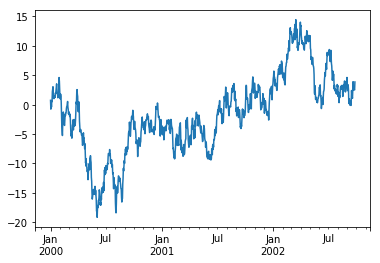

In [270]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [271]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [272]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

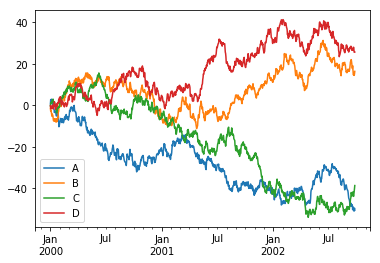

In [273]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [274]:
df.to_csv('data/foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [275]:
pd.read_csv('data/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.717262,-1.480292,-0.266777,-0.159054
1,2000-01-02,2.775963,-2.833296,0.482133,-1.402259
2,2000-01-03,1.526544,-2.440970,1.435074,-1.707177
3,2000-01-04,2.634256,-3.507208,1.290569,-0.618632
4,2000-01-05,2.941204,-4.519456,1.261239,-0.822604
5,2000-01-06,2.895089,-5.254396,1.449868,-0.340252
6,2000-01-07,2.066919,-4.225939,2.510417,-0.370057
7,2000-01-08,1.632854,-4.511591,2.332471,-0.354578
8,2000-01-09,-0.453126,-4.951659,2.370196,0.128163
9,2000-01-10,-0.748738,-6.057750,2.960843,-1.779546


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [276]:
df.to_hdf('data/foo.h5','df')

Reading from a HDF5 Store

In [277]:
pd.read_hdf('data/foo.h5','df')

,A,B,C,D
2000-01-01,0.717262,-1.480292,-0.266777,-0.159054
2000-01-02,2.775963,-2.833296,0.482133,-1.402259
2000-01-03,1.526544,-2.440970,1.435074,-1.707177
2000-01-04,2.634256,-3.507208,1.290569,-0.618632
2000-01-05,2.941204,-4.519456,1.261239,-0.822604
2000-01-06,2.895089,-5.254396,1.449868,-0.340252
2000-01-07,2.066919,-4.225939,2.510417,-0.370057
2000-01-08,1.632854,-4.511591,2.332471,-0.354578
2000-01-09,-0.453126,-4.951659,2.370196,0.128163
2000-01-10,-0.748738,-6.057750,2.960843,-1.779546


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [278]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [279]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.717262,-1.480292,-0.266777,-0.159054
2000-01-02,2.775963,-2.833296,0.482133,-1.402259
2000-01-03,1.526544,-2.440970,1.435074,-1.707177
2000-01-04,2.634256,-3.507208,1.290569,-0.618632
2000-01-05,2.941204,-4.519456,1.261239,-0.822604
2000-01-06,2.895089,-5.254396,1.449868,-0.340252
2000-01-07,2.066919,-4.225939,2.510417,-0.370057
2000-01-08,1.632854,-4.511591,2.332471,-0.354578
2000-01-09,-0.453126,-4.951659,2.370196,0.128163
2000-01-10,-0.748738,-6.057750,2.960843,-1.779546


### Gotchas
If you are trying an operation and you see an exception like:

In [280]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.